In [146]:
import pandas as pd
import seaborn as sns
import re
import locale
import math

In [147]:
df = pd.read_csv('25-10-2022.csv')
df = df.drop_duplicates().sort_values(by="Comment_Count", ascending=False).reset_index(drop=True)

In [148]:
df.head()

,Text,Is_Translated,Comment_Count,URL
0,"As of November 1, two rooms will be available ...",True,88,https://www.facebook.com/groups/13793459623871...
1,Nice room in the coziest street of Eindhoven A...,True,82,https://www.facebook.com/groups/13793459623871...
2,Female roommate wanted #offerA room will be av...,True,39,https://www.facebook.com/groups/13793459623871...
3,"Beste misschien toekomstige huisgenoot, Huize ...",False,37,https://www.facebook.com/groups/13793459623871...
4,"CLOSEDHey girls looking for a room,we are look...",True,35,https://www.facebook.com/groups/13793459623871...


In [149]:
df.describe()

,Comment_Count
count,44.000000
mean,18.727273
std,18.337106
min,1.000000
25%,6.750000
50%,14.000000
75%,28.000000
max,88.000000


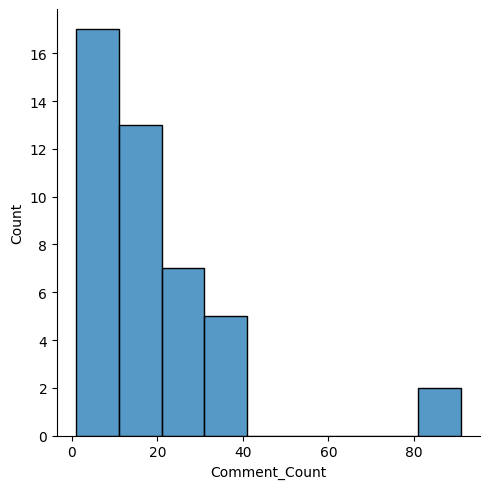

In [150]:
sns.displot(df, x="Comment_Count", binwidth=10)

In [151]:
# for i in range(0, 5):
#     print("Comment count:", df.iloc[i]["Comment_Count"])
#     if df.iloc[i]["Is_Translated"]:
#         print("Original: Dutch")
#     else:
#         print("Original: English")
#     print(df.iloc[i]["Text"])
#     print()
#     print()

In [152]:
# test_string = "$350"
# currency = re.search(pattern, test_string).group()

# decimal_point_char = locale.localeconv()['decimal_point']
# price = re.sub(r'[^0-9'+decimal_point_char+r']+', '', currency)
# price

def getPrice(row):
    pattern = "[\$\£\€]\s?(\d+(?:\.\d{1,2})?)"
    text = row["Text"]
    currency = re.search(pattern, text)

    # If currency isn't before number, check if it's after
    if currency is None:
        pattern = "(\d+(?:\.\d{1,2})?)\s?[\$\£\€]"
        currency = re.search(pattern, text)

    # Check for "euro" in the string
    if currency is None:
        words = text.lower().split()
        if "euro" in words:
            currency = [words[words.index("euro")-1]]
        if "euros" in words:
            currency = [words[words.index("euros")-1]]
        if "euro/month." in words:
            currency = [words[words.index("euro/month.")-1]]
        if "incl" in words:
            currency = [words[words.index("incl")-1]]

    # Check for ",-"
    if currency is None:
        pattern = "(\d+(?:\.\d{1,2})?)\s?\,\-"
        currency = re.search(pattern, text)
    if currency is None:
        return math.nan
    currency = currency[0]
    decimal_point_char = locale.localeconv()['decimal_point']
    price = re.sub(r'[^0-9'+decimal_point_char+r']+', '', currency)
    return price

In [153]:
df["Price"] = df.apply(lambda row: getPrice(row), axis=1)

In [154]:
# susses = [3, 7, 18, 27, 42, 43]
# for sus in susses:
#     print(df.iloc[sus]["Price"])
#     print(df.iloc[sus]["Text"])
#     print()

In [155]:
# Manual fixing because it's faster and it's late at night
df.at[3, "Price"] = 350
df.at[7, "Price"] = 310
df.at[18, "Price"] = 390
df.at[27, "Price"] = 285
df.at[43, "Price"] = 588
df = df.drop([40, 41, 42]) #NaN and people looking for a place, very high price 

In [156]:
df["Price"] = pd.to_numeric(df["Price"])
df["Price"].describe()

count     41.000000
mean     397.158537
std      127.920602
min      254.000000
25%      320.000000
50%      360.000000
75%      450.000000
max      940.000000
Name: Price, dtype: float64

In [161]:
# df[df["Price"] == float(940)]["Text"]
df.iloc[28]["Text"]

"HOMEMATE WANTED FROM 1 NOVEMBERBecause my two roommates are leaving Eindhoven, I am looking for two new roommates for a corner house at the Boschdijk.The room with its own bathroom is about 18 m2 and is located on the first floor.The largest room (with storage space) is about 30 m2 in size and is located on the top floor. Here you share a bathroom with me.The house is 4 minutes by bike from Strijp-S station, 10 minutes to the center. Jumbo and the Woenselse market within walking distance.We have a shared washing machine and dishwasher. These amenities, along with internet, are already included in the rent. (€940: rent, tv/internet, g/w/l)If you are interested in one of these rooms, send a message about yourself and who knows we will invite you to the viewing evening on Tuesday 25 October.You can't but you want to respond? No problem, we can always call!"

<AxesSubplot: xlabel='Price', ylabel='Comment_Count'>

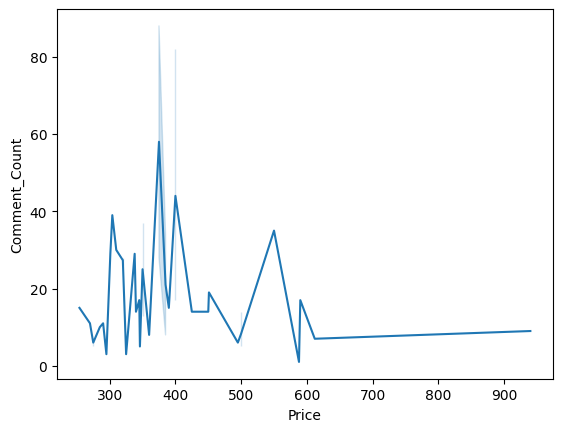

In [162]:
sns.lineplot(df, x="Price", y="Comment_Count")